## Introduction:
In this Competition ,we are tasked with predicting the fare amount for a taxi ride in New York City given the pickup and Dropoff locations. 

## Features:
* pickup-datetime: time indicating when the taxi ride started
* pickup_longitude: longitude coordinate of where the taxi ride started.
* pickup_latitude - latitude coordinate of where the taxi ride started.
* dropoff_longitude - longitude coordinate of where the taxi ride ended.
* dropoff_latitude - latitude coordinate of where the taxi ride ended.
* passenger_count - integer indicating the number of passengers in the taxi ride.

## Target:
* fare_amount - float dollar amount of the cost of the taxi ride.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [3]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data.tail()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,13:14.0,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


## EDA and Feature Engineering

1. describing Features of data
2. Checking null values
3. Changing datatype of pickup datetime 
4. Calculation of distance
5. Visualization

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
# Description of all features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,50000.0,11.364171,9.685557,-5.000000,6.000000,8.500000,12.500000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-73.992062,-73.981840,-73.967148,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,40.734880,40.752678,40.767360,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,2.000000,6.000000


In [7]:
data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [10]:
data["amount"].value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

In [11]:
print("Fare amount greater than 10$ :", data[data["amount"]>=10].shape[0])
data[data["amount"] >=10]

Fare amount greater than 10$ : 19558


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
16,22:00.0,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1
20,18:00.0,10.5,2010-09-07 13:18:00 UTC,-73.985382,40.747858,-73.978377,40.762070,1
...,...,...,...,...,...,...,...,...
49987,24:00.0,16.5,2014-03-17 11:24:00 UTC,-73.992928,40.748422,-73.963497,40.774297,1
49989,42:00.0,17.3,2011-12-07 21:42:00 UTC,-73.998573,40.719868,-73.967462,40.793382,1
49991,56:19.0,10.5,2013-10-17 19:56:19 UTC,-73.991685,40.739494,-73.985357,40.731971,1
49995,25:15.0,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1


In [13]:
## Converting pickup_datetime from Object type to TimeStamp type

data["date_time_of_pickup"] = pd.to_datetime(data["date_time_of_pickup"])

In [14]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [15]:
data.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

**Calculation of distance between Latitude and Longitude**

The great circle distance is the shortest distance between two points on a sphere. In this notebook we can calculate distance between two points using Haversine Formula.
First, convert the latitude and longitude values from decimal degrees to radians. For this divide the values of longitude and latitude of both the points by 180/pi. Use the value of r (radius) as 6371.
For more details on [Haversine distance](https://www.geeksforgeeks.org/haversine-formula-to-find-distance-between-two-points-on-a-sphere/) and completeness of formula used visit the mentioned site.

In [16]:
from math import radians, cos,sin, asin,sqrt

def distance(lon1, lon2, lat1 , lat2):
    
    
    lon1 =radians(lon1)
    lon2 =radians(lon2)
    lat1 =radians(lat1)
    lat2 =radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371
    return(round (c * r, 2))
    
    
d = []
for i in range(data.shape[0]):
    d.append(distance(data["latitude_of_pickup"][i],
                      data["latitude_of_dropoff"][i],
                      data["longitude_of_pickup"][i],
                      data["longitude_of_dropoff"][i]))

In [17]:
data["distance in kms"] = d

In [18]:
data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [19]:
# Dropping Longitude and Latitude Features

data.drop(["latitude_of_pickup", "longitude_of_pickup", "latitude_of_dropoff", "longitude_of_dropoff"], axis=1, inplace=True)

In [20]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36


In [22]:
print("Date in data : ", data["date_time_of_pickup"].dt.day.sort_values().unique())
print("Month in data : ", data["date_time_of_pickup"].dt.month.unique()[0])
print("Year in data : ", data["date_time_of_pickup"].dt.year.unique()[0])

Date in data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month in data :  6
Year in data :  2009


In [23]:
# Mapping days and Weekname
week_names = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

data["weekday_name"] = data["date_time_of_pickup"].dt.weekday.map(week_names)

In [108]:
data.head()

,pickup_datetime,fare_amount,fare_class,passenger_count,distance in kms,weekday_name
0,2010-04-19 08:17:56+00:00,6.5,0,1,1.93,Sunday
1,2010-04-17 15:43:53+00:00,6.9,0,1,1.77,Friday
2,2010-04-17 11:23:26+00:00,10.1,1,2,3.82,Friday
3,2010-04-11 21:25:03+00:00,8.9,0,1,2.16,Saturday
4,2010-04-17 02:19:01+00:00,19.7,1,1,9.46,Friday


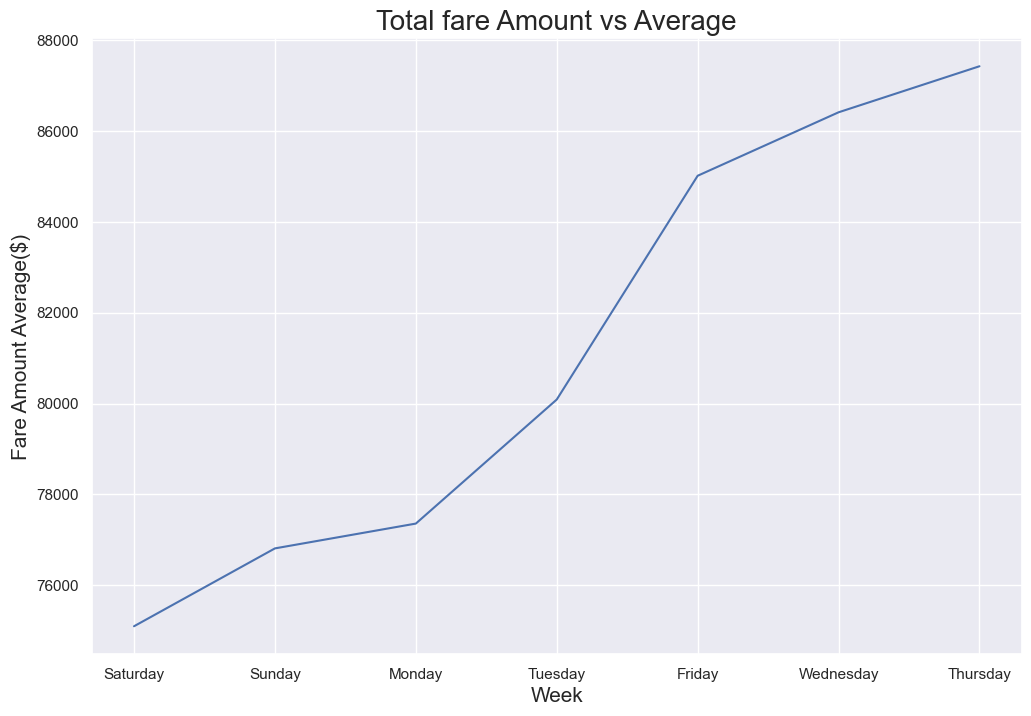

In [24]:
plt.figure(figsize = (12,8))
data.groupby("weekday_name")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=15)
plt.ylabel("Fare Amount Average($)", fontsize=15)
plt.title("Total fare Amount vs Average", fontsize=20)
plt.show()

In [25]:
week_names_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}

In [26]:
data["weekday_name"] = data["weekday_name"].map(week_names_encode)

In [27]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3


In [28]:
data["Hour"] = data["date_time_of_pickup"].dt.hour

In [29]:
data["Hour"].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5], dtype=int64)

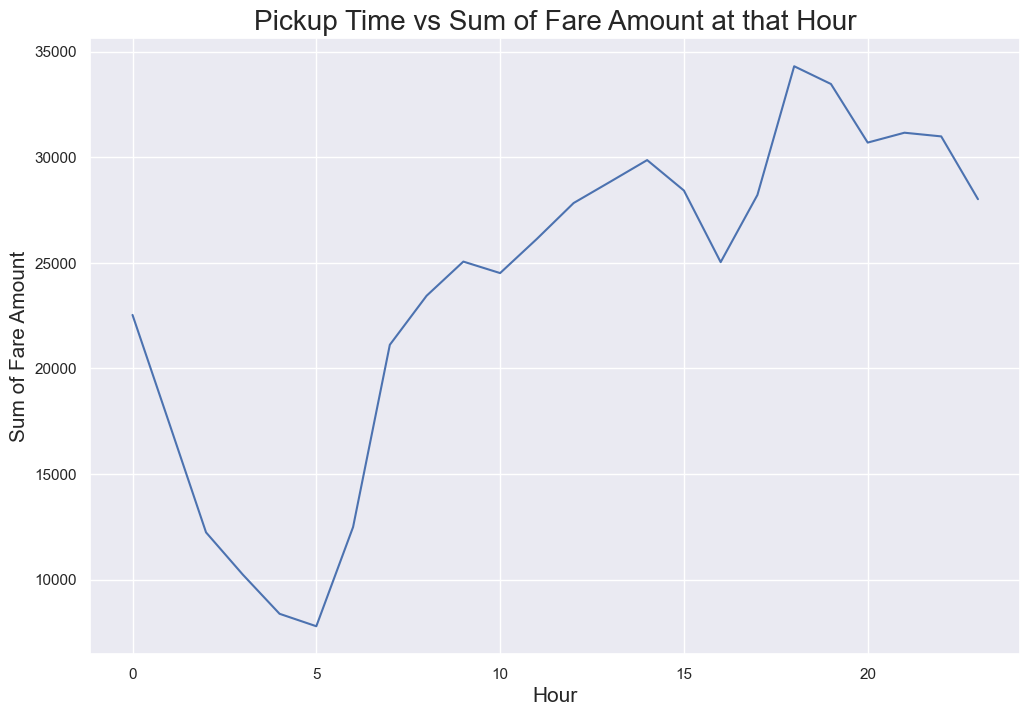

In [31]:

# Plotting graph of Fare vs Pickup time
plt.figure(figsize = (12,8))

data.groupby("Hour")["amount"].sum().plot()
plt.title("Pickup Time vs Sum of Fare Amount at that Hour", fontsize=20)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Sum of Fare Amount", fontsize=15)
plt.show()

In [116]:
data["Month_Day"] = data["pickup_datetime"].dt.day

In [33]:
# Sum of Taxi Fare in a particular day

for day in list(data["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(data[data.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")


Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

In [38]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7


In [39]:
data["no_of_passenger"].value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

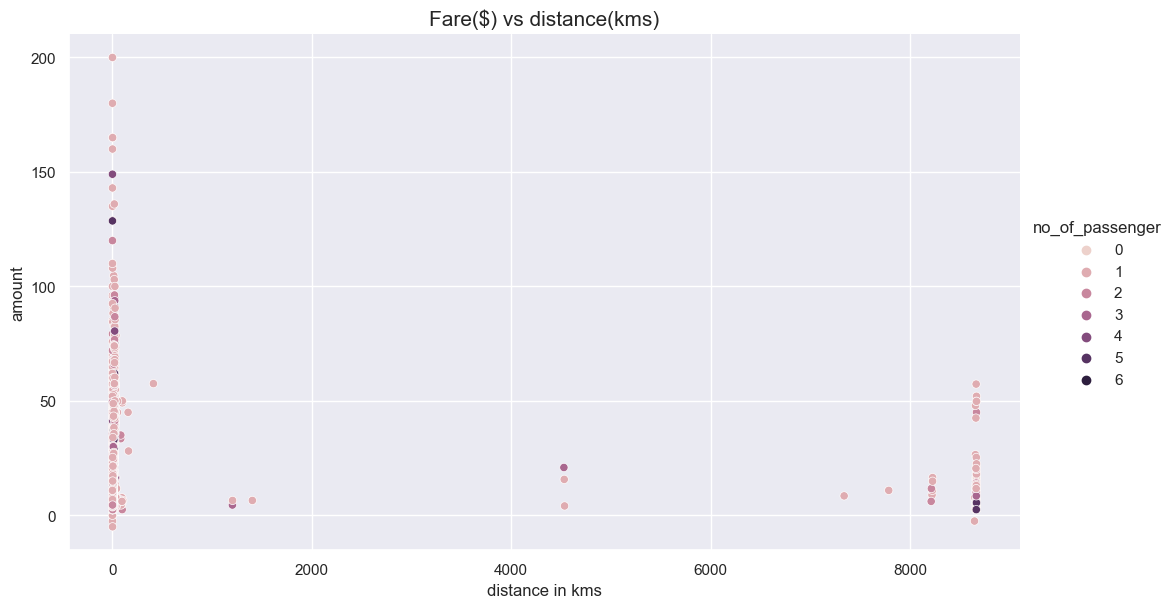

In [40]:
## Graph - Fare vs Distance

sns.relplot(data = data, kind = "scatter",x = "distance in kms",y = "amount",
            hue = "no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()


In [41]:
data.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,distance in kms,weekday_name,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,4.63,3,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,1.00,6,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,0.91,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,1.36,3,7


In [43]:
data["amount"].value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
26.60       1
25.39       1
55.83       1
30.04       1
27.05       1
Name: amount, Length: 703, dtype: int64

In [44]:
data["amount"].unique()

array([ 4.5000e+00,  1.6900e+01,  5.7000e+00,  7.7000e+00,  5.3000e+00,
        1.2100e+01,  7.5000e+00,  1.6500e+01,  9.0000e+00,  8.9000e+00,
        5.5000e+00,  4.1000e+00,  7.0000e+00,  5.0000e+00,  1.2500e+01,
        4.0000e+00,  1.0500e+01,  1.1500e+01,  4.9000e+00,  6.1000e+00,
        7.3000e+00,  6.5000e+00,  9.3000e+00,  2.2540e+01,  3.1900e+01,
        1.8100e+01,  5.8000e+01,  9.8000e+00,  8.1000e+00,  1.0900e+01,
        1.7500e+01,  6.9000e+00,  3.3000e+00,  9.7000e+00,  8.0000e+00,
        2.5500e+01,  1.5300e+01,  3.4670e+01,  1.3700e+01,  8.5000e+00,
        3.7000e+00,  1.0100e+01,  1.5070e+01,  2.4900e+01,  1.7000e+01,
        1.2000e+01,  1.1000e+01,  1.3500e+01,  1.4000e+01,  1.0000e+01,
        1.4100e+01,  5.2000e+01,  1.1300e+01,  1.2900e+01,  9.5000e+00,
        3.5000e+01,  1.4500e+01,  3.2500e+01,  1.7700e+01,  1.9000e+01,
        4.9570e+01,  2.2500e+01,  5.2500e+01,  1.6000e+01,  1.7300e+01,
        2.1500e+01,  1.4900e+01,  3.5500e+01,  1.1700e+01,  2.30

In [45]:
# Total passenger travelling in a Taxi, paying Fare amount less than or more than $10.

data.groupby(["amount","no_of_passenger"])[["no_of_passenger"]].sum()

,,no_of_passenger
amount,no_of_passenger,
-5.0,1,1
-3.0,4,4
-2.9,1,1
-2.5,1,3
0.0,1,3
...,...,...
149.0,4,4
160.0,1,1
165.0,1,2


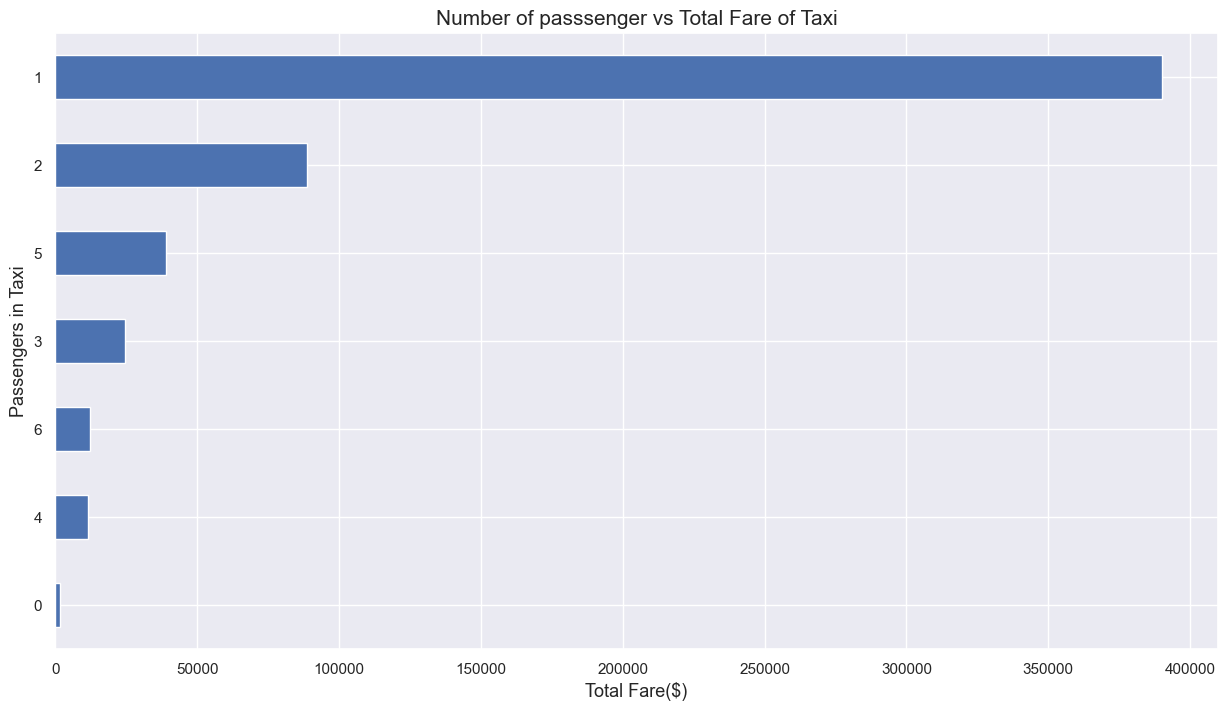

In [46]:
plt.figure(figsize=(15,8))
data.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [55]:
data.head()

,unique_id,amount,no_of_passenger,distance in kms,weekday_name,Hour
0,26:21.0,4.5,1,0.41,1,17
1,52:16.0,16.9,1,4.63,3,16
2,35:00.0,5.7,2,1.00,6,0
3,30:42.0,7.7,1,0.91,5,4
4,51:00.0,5.3,1,1.36,3,7


In [76]:
data.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64